In [4]:
## NAME: MITHUN MS
## REGISTER NUMBER: 212222240067

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
single_image= X_train[0]

In [9]:
single_image.shape

(28, 28)

MITHUN MS 212222240067


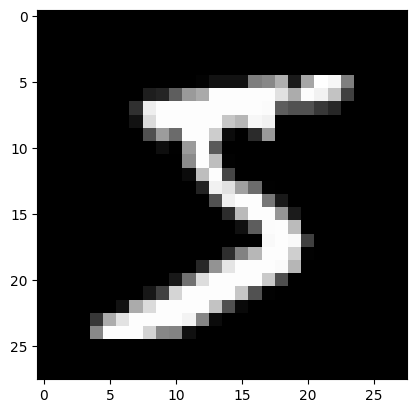

In [10]:
print("MITHUN MS 212222240067")
plt.imshow(single_image,cmap='gray')

In [11]:
y_train.shape

(60000,)

In [12]:
X_train.min()

0

In [13]:
X_train.max()

255

In [15]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [16]:
X_train_scaled.min()

0.0

In [17]:
X_train_scaled.max()

1.0

In [18]:
y_train[0]

5

In [19]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [20]:
y_train_onehot.shape

(60000, 10)

MITHUN MS 212222240067


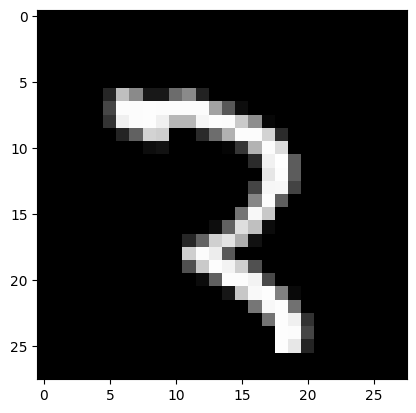

In [21]:
single_image = X_train[500]
print("MITHUN MS 212222240067")
plt.imshow(single_image,cmap='gray')

In [22]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [28]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 77s 82ms/step - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.0514 - val_accuracy: 0.9826
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0474 - val_accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0392 - val_accuracy: 0.9876
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0446 - val_accuracy: 0.9866
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0439 - val_accuracy: 0.9869


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.065288,0.980167,0.051433,0.9826
1,0.042468,0.986767,0.047450,0.9844
2,0.031233,0.990283,0.039180,0.9876
3,0.022304,0.992750,0.044569,0.9866
4,0.018667,0.993983,0.043938,0.9869


MITHUN MS 212222240067


<Axes: >

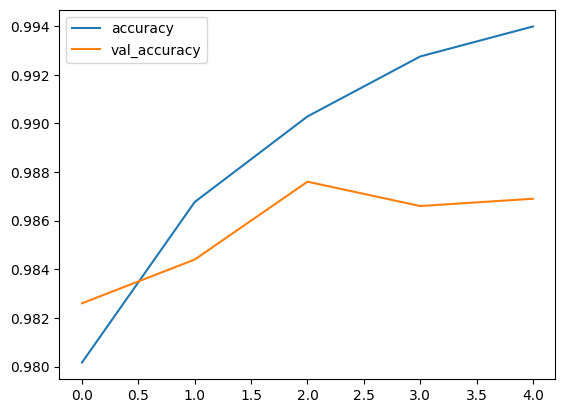

In [31]:
print("MITHUN MS 212222240067")
metrics[['accuracy','val_accuracy']].plot()

MITHUN 212222240067


<Axes: >

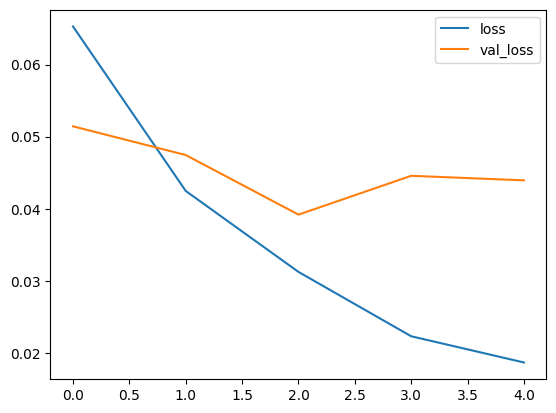

In [32]:
print("MITHUN 212222240067")
metrics[['loss','val_loss']].plot()

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [34]:
print("MITHUN 212222240067")
print(confusion_matrix(y_test,x_test_predictions))

MITHUN 212222240067
[[ 969    0    1    1    0    0    5    0    1    3]
 [   0 1131    1    0    0    0    2    0    1    0]
 [   2    3 1008    3    3    0    2    5    5    1]
 [   0    0    2 1005    0    1    0    0    2    0]
 [   0    0    0    0  974    0    3    0    0    5]
 [   0    0    0    8    0  881    3    0    0    0]
 [   4    3    0    0    2    2  947    0    0    0]
 [   0    4    5    5    0    0    0 1007    3    4]
 [   2    1    3    1    3    1    2    1  956    4]
 [   0    3    0    0    5    5    0    2    3  991]]


In [35]:
print("MITHUN 212222240067")
print(classification_report(y_test,x_test_predictions))

MITHUN 212222240067
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [38]:
img = image.load_img('images.jpeg')

In [39]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [41]:
img = image.load_img('images.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [43]:
print(x_single_prediction)

[6]


MITHUN 212222240067


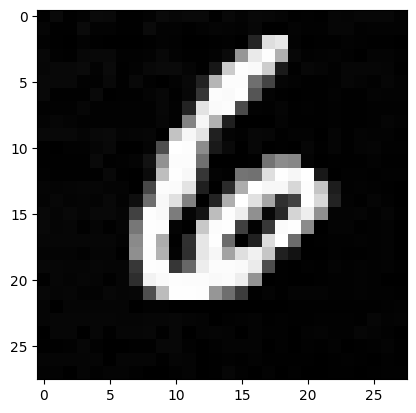

In [44]:
print("MITHUN 212222240067")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [45]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [46]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [47]:
print(x_single_prediction)
print("MITHUN 212222240067")

[6]
MITHUN 212222240067
